In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', 100)

print("Setup Complete.")

Setup Complete.


In [3]:
RAW_DATA_PATH = '../data_raw/KOI.csv'

# Check if the file exists
if not os.path.exists(RAW_DATA_PATH):
    raise FileNotFoundError(f"CRITICAL: Raw data file not found at {RAW_DATA_PATH}. Make sure you have the data_raw directory.")

df_koi = pd.read_csv(RAW_DATA_PATH, comment='#')

print(f"KOI dataset loaded successfully. Shape: {df_koi.shape}")
df_koi.head()

KOI dataset loaded successfully. Shape: (9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
print("Data Info Before Filtering:")
df_koi.info()

# Let's focus on the key columns. Many are error columns or pipeline flags we won't use directly.
# These are the columns relevant to our classical model and new physics features.
KEY_COLS = [
    'koi_disposition', 'koi_score', 'koi_period', 'koi_duration', 'koi_depth',
    'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
    'koi_steff', 'koi_slogg', 'koi_srad',
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec'
]
df = df_koi[KEY_COLS].copy()

# Handle nulls for the EDA - in production, our script handles this more robustly.
df = df.dropna(subset=['koi_disposition'])
print(f"\nShape after selecting key columns and dropping rows with null disposition: {df.shape}")

print("\nData Info After Filtering:")
df.info()

Data Info Before Filtering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 

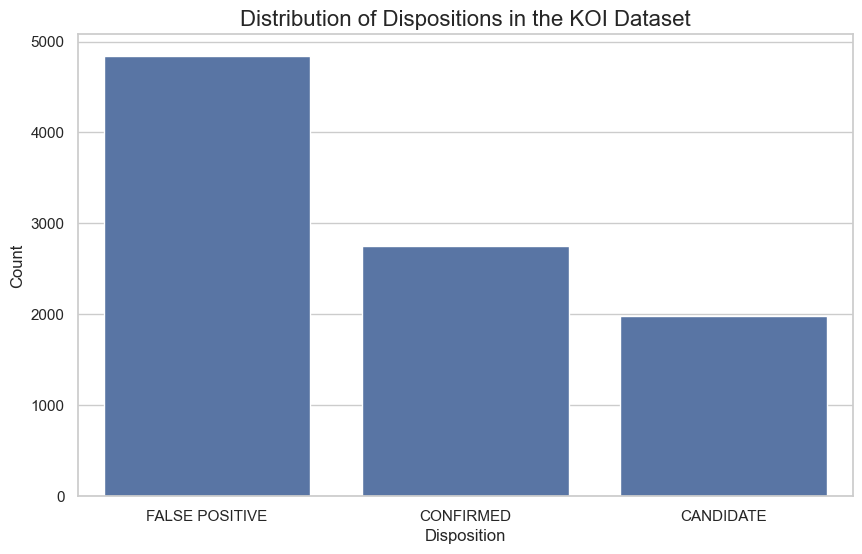

Disposition Value Counts (Absolute):
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

Disposition Value Counts (Normalized):
koi_disposition
FALSE POSITIVE    0.505960
CONFIRMED         0.287118
CANDIDATE         0.206922
Name: proportion, dtype: float64


In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='koi_disposition', data=df, order=df['koi_disposition'].value_counts().index)
plt.title('Distribution of Dispositions in the KOI Dataset', fontsize=16)
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

print("Disposition Value Counts (Absolute):")
print(df['koi_disposition'].value_counts())
print("\nDisposition Value Counts (Normalized):")
print(df['koi_disposition'].value_counts(normalize=True))

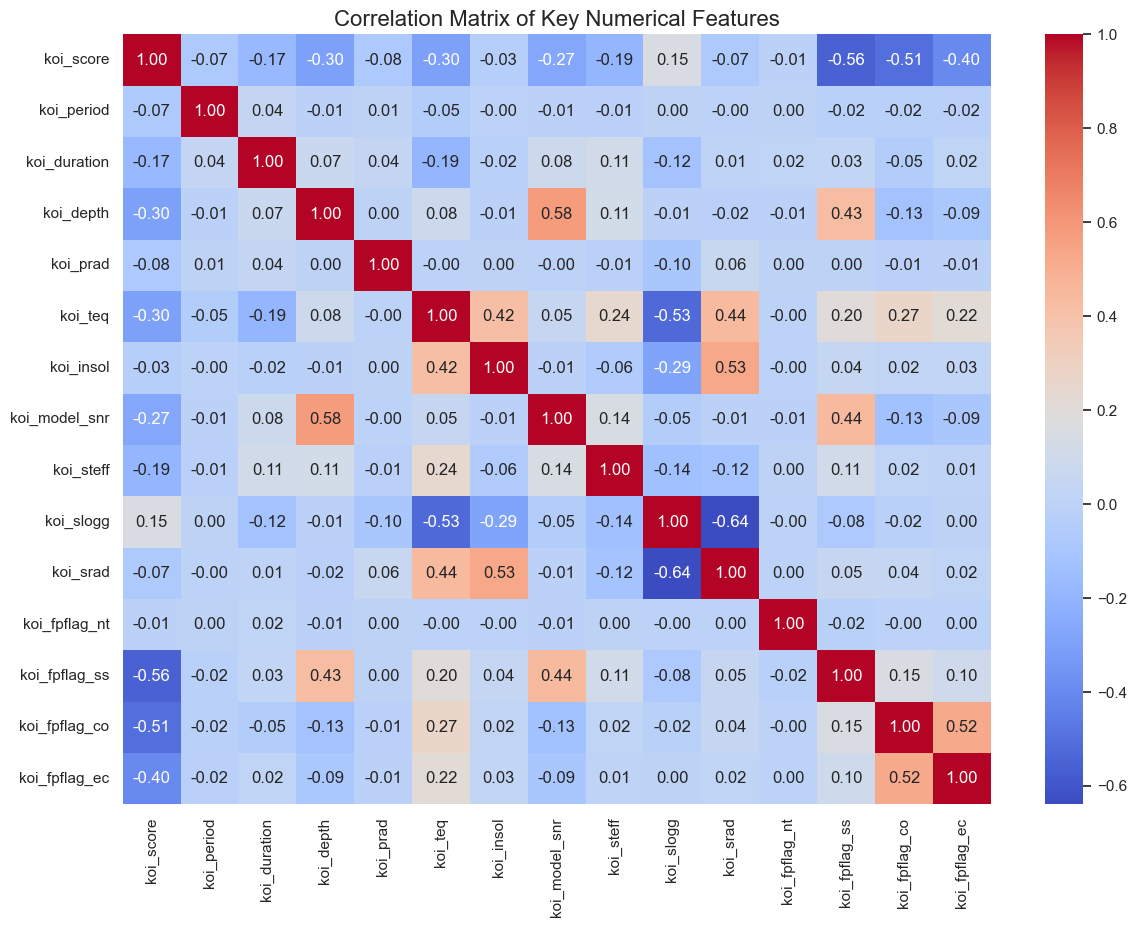

In [6]:
plt.figure(figsize=(14, 10))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Numerical Features', fontsize=16)
plt.show()

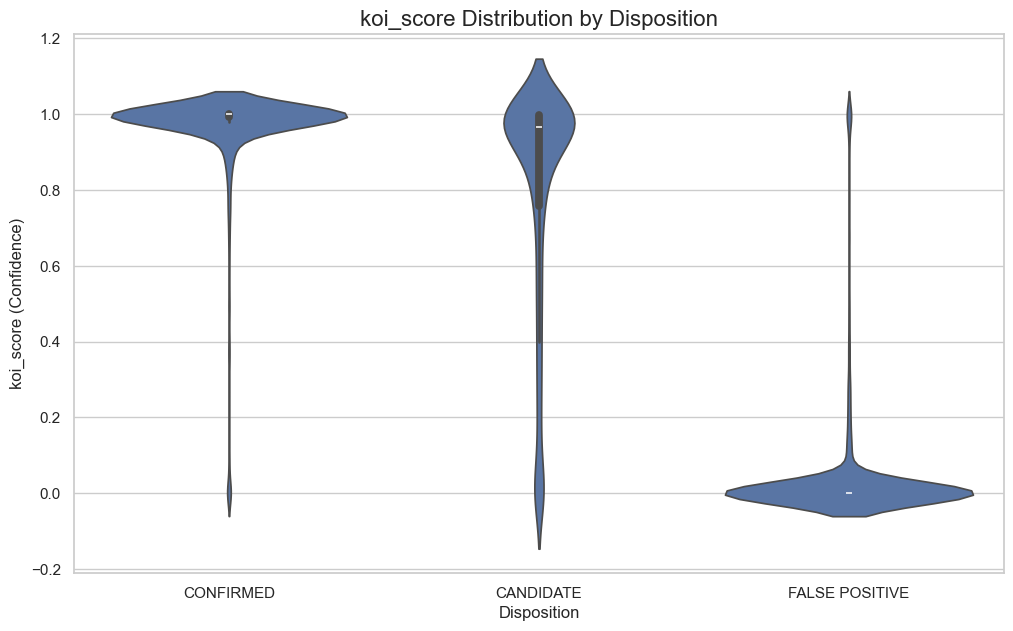

In [7]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='koi_disposition', y='koi_score', data=df)
plt.title('koi_score Distribution by Disposition', fontsize=16)
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('koi_score (Confidence)', fontsize=12)
plt.show()

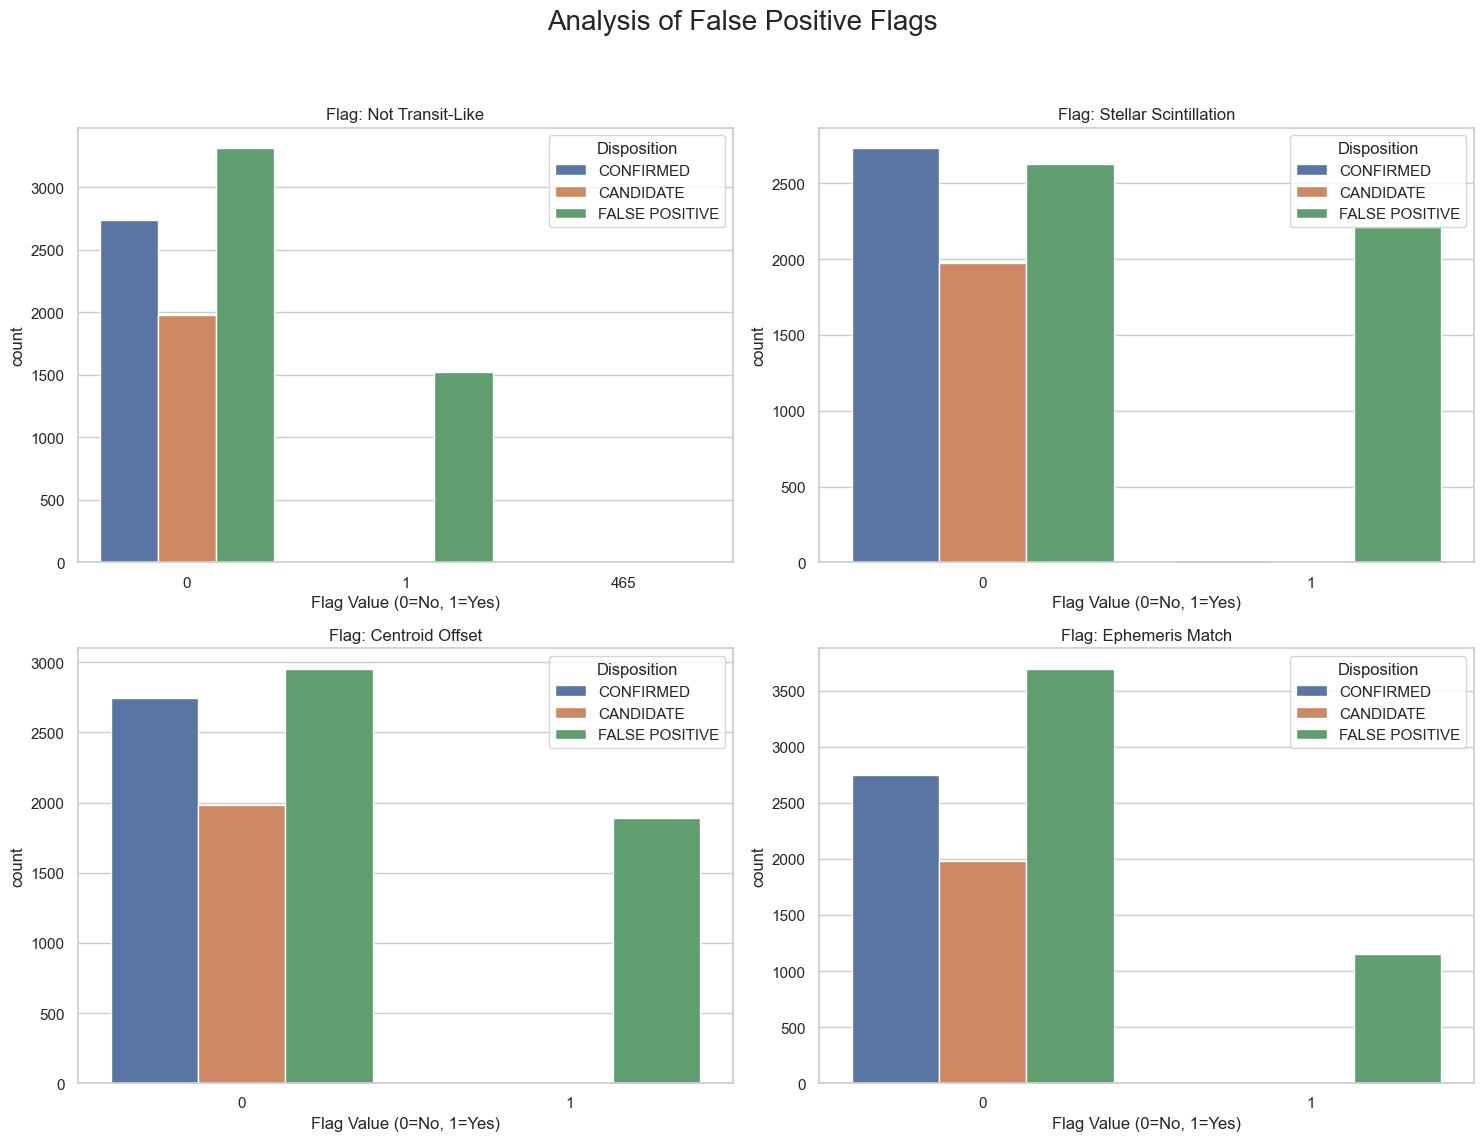

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analysis of False Positive Flags', fontsize=20)
fp_flags = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
flag_names = ['Not Transit-Like', 'Stellar Scintillation', 'Centroid Offset', 'Ephemeris Match']

for i, flag in enumerate(fp_flags):
    ax = axes.flatten()[i]
    sns.countplot(data=df, x=flag, hue='koi_disposition', ax=ax)
    ax.set_title(f'Flag: {flag_names[i]}')
    ax.set_xlabel('Flag Value (0=No, 1=Yes)')
    ax.legend(title='Disposition')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

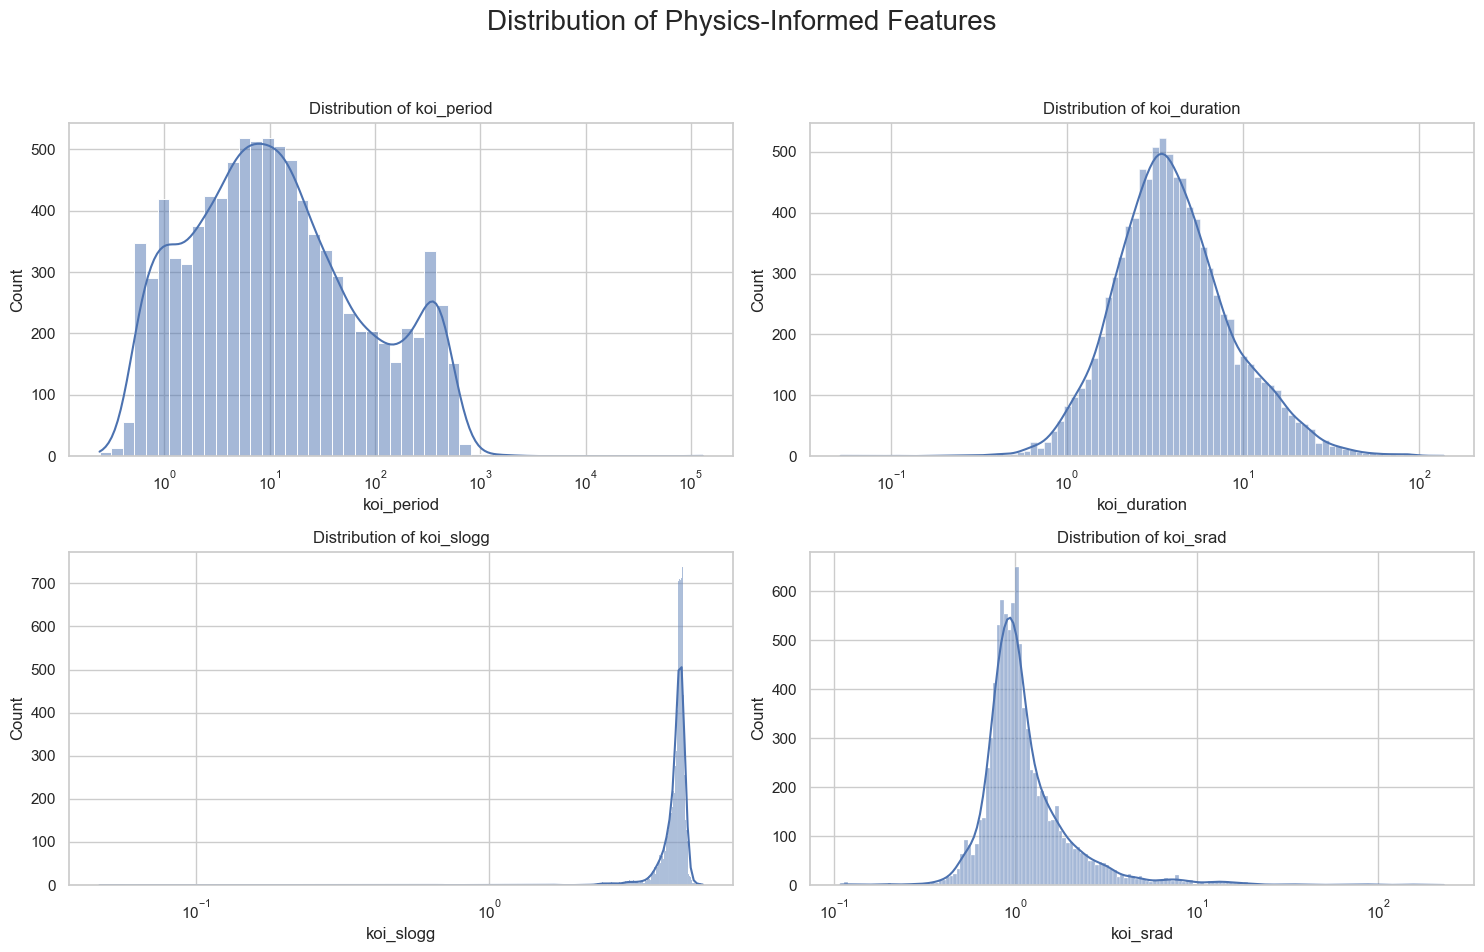


Descriptive statistics for density features:


,koi_period,koi_duration,koi_slogg,koi_srad
count,9564.000000,9564.000000,9201.000000,9201.000000
mean,75.671358,5.621606,4.310157,1.728712
std,1334.744046,6.471554,0.432606,6.127185
min,0.241843,0.052000,0.047000,0.109000
25%,2.733684,2.437750,4.218000,0.829000
50%,9.752831,3.792600,4.438000,1.000000
75%,40.715178,6.276500,4.543000,1.345000
max,129995.778400,138.540000,5.364000,229.908000


In [9]:
# These are the raw ingredients for our new physics-informed feature.
# We need to understand their distributions. Are they heavily skewed?
density_features = ['koi_period', 'koi_duration', 'koi_slogg', 'koi_srad']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Physics-Informed Features', fontsize=20)

for i, feat in enumerate(density_features):
    ax = axes.flatten()[i]
    # Plotting on a log scale helps visualize heavily skewed data
    sns.histplot(df[feat].dropna(), ax=ax, kde=True, log_scale=True)
    ax.set_title(f'Distribution of {feat}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Let's also look at the raw statistics to see the min/max values
print("\nDescriptive statistics for density features:")
df[density_features].describe()